### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

In [224]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

##### Task 2. Augmentation

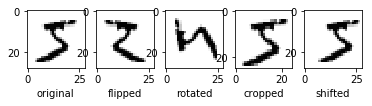

In [231]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
image = x_train[0]
plt.subplot(1, 5, 1)
plt.xlabel('original')
plt.imshow(image, cmap='Greys')

image_flipped = np.fliplr(image)
plt.subplot(1, 5, 2)
plt.xlabel('flipped')
plt.imshow(image_flipped, cmap='Greys')

image_rotated = np.rot90(image)
plt.subplot(1, 5, 3)
plt.xlabel('rotated')
plt.imshow(image_rotated, cmap='Greys')

lx, ly = image.shape
image_cropped = image[lx // 16: - lx // 16, ly // 16: - ly // 16]
plt.subplot(1, 5, 4)
plt.xlabel('cropped')
plt.imshow(image_cropped, cmap='Greys')


image_shifted = np.roll(image, 3)
plt.subplot(1, 5, 5)
plt.xlabel('shifted')
plt.imshow(image_shifted, cmap='Greys')

plt.show()


##### Task 3. Neural Network

In [265]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [233]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##### Task 4. Train loop

In [243]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0181 - acc: 0.9940
Epoch 2/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.0162 - acc: 0.9945
Epoch 3/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0135 - acc: 0.9954
Epoch 4/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0147 - acc: 0.9953
Epoch 5/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0149 - acc: 0.9951


##### Task 5. Loss plot

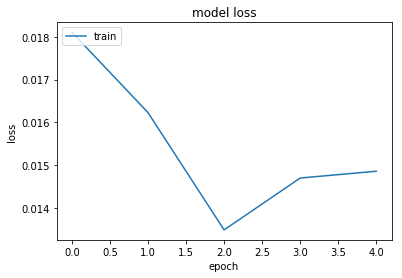

In [257]:
# print(history.history)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Task 6. Test set accuracy

In [250]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/step


[0.06485777167017259, 0.9862]

##### Task 7. Inference

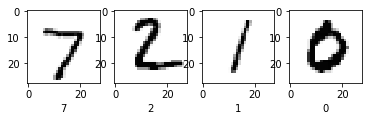

In [251]:
plt.subplot(1,4,1)
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.xlabel(pred.argmax());

plt.subplot(1,4,2)
image_index = 1
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.xlabel(pred.argmax());

plt.subplot(1,4,3)
image_index = 2
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.xlabel(pred.argmax());

plt.subplot(1,4,4)
image_index = 3
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.xlabel(pred.argmax());
plt.show()